# Maze Building

The purpose of this notebook is to explain how the functions in `maze_functions.py` construct a maze using the [union-find/disjoint-set data structure](https://en.wikipedia.org/wiki/Disjoint-set_data_structure).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import maze_functions

%matplotlib inline

The algorithm we use to build mazes results in a maze where there is a path between any two cells in the maze and there are no loops. One such maze is picture below.

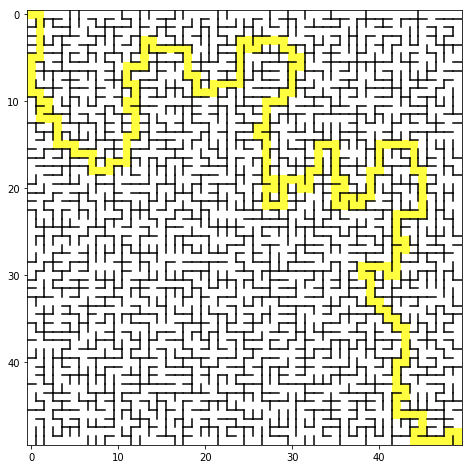

In [2]:
maze = maze_functions.Maze(n_cols = 50, n_rows = 50, seed = 48)

plt.figure(figsize = [8, 8])
maze.plot(with_solution = True)

The maze-building algorithm is fairly straightforward. We start with all possible walls so that each maze cell is isolated. We then randomly cycle through the walls and either keep or discard them using the following rule. If there already exists a path connecting the two cells separated by the wall (i.e. the two cells are part of the same connected component), we keep it. On the other hand, if there is no existing path between the two cells (the cells are part of different connected components), we tear down the wall.

To keep track of the connected components we use a union-find/disjoint-set data structure. Our implementation represents the cells in an array whose length is the number of cells. The values of the array are either -1 or a valid index for the array. A value of $-1$ at index $i$ means cell $i$ is the designated representative for all cells belonging to its connected component. A value of $j \neq -1$ at index $i$ means that cell $i$ is in the same connected component as cell $j$. We find the representative for the connected component of celll $i$ using the following method:
```python
def find_component(array, index):
    """
    Find method for union-find/disjoint set data structure. Returns
    the connected component to which the cell at the given index
    belongs.
    """
    while array[index] != -1:
        index = array[index]
    return index
```
Because we start with each cell as its own connected component, all the array values are initialized to be $-1$. When the wall between cells $i$ and $j$ is removed, we find the representatives for the two cells, say $k$ and $\ell$ and replace the value of $-1$ at index $\ell$ with the value $k$.

Let's start with a very simple example. Say we start with a 2x2 maze. We'll list the array indices above for convenience. The initial array is as follows:
$$
\begin{array}{r c c c c l}
 & 0 & 1 & 2 & 3 & \\
[ & -1 & -1 & -1 & -1 & ] \\
\end{array}
$$
Suppose we start by joining cells $0$ and $1$. The array then becomes
$$
\begin{array}{r c c c c l}
 & 0 & 1 & 2 & 3 & \\
[ & -1 & 0 & -1 & -1 & ] \\
\end{array}
$$
Similarly, let us join cells $2$ and $3$:
$$
\begin{array}{r c c c c l}
 & 0 & 1 & 2 & 3 & \\
[ & -1 & 0 & -1 & 2 & ] \\
\end{array}
$$
Finally, let's join cells $1$ and $3$. For this, we need to find the representatives of each component: $0$ and $2$, respectively. Therefore, we update the value at index $2$ to get a final array of
$$
\begin{array}{r c c c c l}
 & 0 & 1 & 2 & 3 & \\
[ & -1 & 0 & 0 & 2 & ] \\
\end{array}
$$
Now, if you want to look up the representative for cell $3$, you look at index $3$ and see the value $2$; at index $2$ we see the value $0$; and at index $0$ we see the value $-1$ so it follows that cell $0$ is the representative for the connected component to which cell $3$ belongs.
 
Next we'll demonstrate how the maze-building algorithm is used to build the following 4x5 maze.

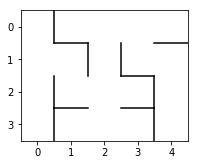

In [2]:
toy_maze = maze_functions.Maze(4, 5, 6, show_construction= False)

plt.figure(figsize = [0.6*5, 0.6*4])
toy_maze.plot(with_solution = False)

Starting with all possible walls, each maze cell is its own  connected component.

Union-Find Array:
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


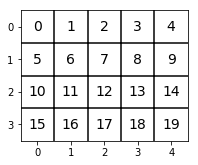

Next Wall: (12, 13)
Cells 12 and 13 are not connected --> remove wall!

New Union-Find Array:
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 12, -1, -1, -1, -1, -1, -1]


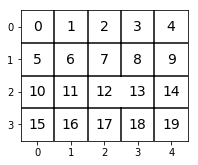

Next Wall: (11, 12)
Cells 11 and 12 are not connected --> remove wall!

New Union-Find Array:
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 11, 12, -1, -1, -1, -1, -1, -1]


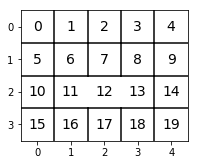

Next Wall: (3, 4)
Cells 3 and 4 are not connected --> remove wall!

New Union-Find Array:
[-1, -1, -1, -1, 3, -1, -1, -1, -1, -1, -1, -1, 11, 12, -1, -1, -1, -1, -1, -1]


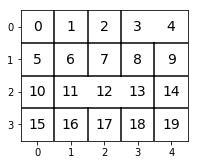

Next Wall: (7, 12)
Cells 7 and 12 are not connected --> remove wall!

New Union-Find Array:
[-1, -1, -1, -1, 3, -1, -1, -1, -1, -1, -1, 7, 11, 12, -1, -1, -1, -1, -1, -1]


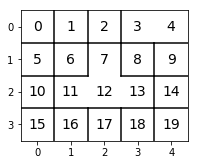

Next Wall: (16, 17)
Cells 16 and 17 are not connected --> remove wall!

New Union-Find Array:
[-1, -1, -1, -1, 3, -1, -1, -1, -1, -1, -1, 7, 11, 12, -1, -1, -1, 16, -1, -1]


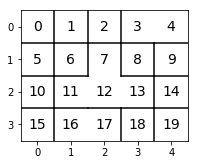

Next Wall: (5, 10)
Cells 5 and 10 are not connected --> remove wall!

New Union-Find Array:
[-1, -1, -1, -1, 3, -1, -1, -1, -1, -1, 5, 7, 11, 12, -1, -1, -1, 16, -1, -1]


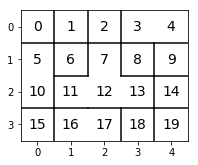

Next Wall: (6, 11)
Cells 6 and 11 are not connected --> remove wall!

New Union-Find Array:
[-1, -1, -1, -1, 3, -1, -1, 6, -1, -1, 5, 7, 11, 12, -1, -1, -1, 16, -1, -1]


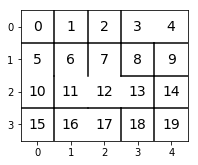

Next Wall: (17, 18)
Cells 17 and 18 are not connected --> remove wall!

New Union-Find Array:
[-1, -1, -1, -1, 3, -1, -1, 6, -1, -1, 5, 7, 11, 12, -1, -1, -1, 16, 16, -1]


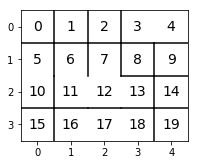

Next Wall: (12, 17)
Cells 12 and 17 are not connected --> remove wall!

New Union-Find Array:
[-1, -1, -1, -1, 3, -1, -1, 6, -1, -1, 5, 7, 11, 12, -1, -1, 6, 16, 16, -1]


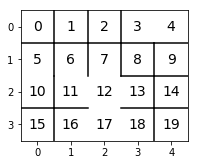

Next Wall: (1, 2)
Cells 1 and 2 are not connected --> remove wall!

New Union-Find Array:
[-1, -1, 1, -1, 3, -1, -1, 6, -1, -1, 5, 7, 11, 12, -1, -1, 6, 16, 16, -1]


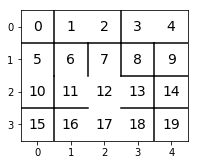

Next Wall: (10, 15)
Cells 10 and 15 are not connected --> remove wall!

New Union-Find Array:
[-1, -1, 1, -1, 3, -1, -1, 6, -1, -1, 5, 7, 11, 12, -1, 5, 6, 16, 16, -1]


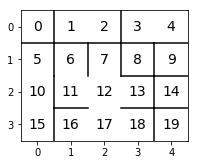

Next Wall: (2, 7)
Cells 2 and 7 are not connected --> remove wall!

New Union-Find Array:
[-1, -1, 1, -1, 3, -1, 1, 6, -1, -1, 5, 7, 11, 12, -1, 5, 6, 16, 16, -1]


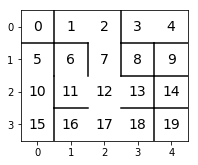

Next Wall: (13, 18)
Cells 13 and 18 are already connected -> keep wall!

Next Wall: (2, 3)
Cells 2 and 3 are not connected --> remove wall!

New Union-Find Array:
[-1, -1, 1, 1, 3, -1, 1, 6, -1, -1, 5, 7, 11, 12, -1, 5, 6, 16, 16, -1]


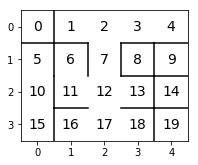

Next Wall: (3, 8)
Cells 3 and 8 are not connected --> remove wall!

New Union-Find Array:
[-1, -1, 1, 1, 3, -1, 1, 6, 1, -1, 5, 7, 11, 12, -1, 5, 6, 16, 16, -1]


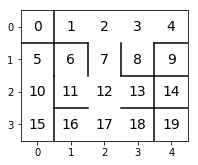

Next Wall: (9, 14)
Cells 9 and 14 are not connected --> remove wall!

New Union-Find Array:
[-1, -1, 1, 1, 3, -1, 1, 6, 1, -1, 5, 7, 11, 12, 9, 5, 6, 16, 16, -1]


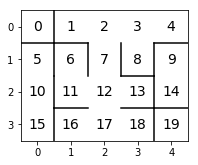

Next Wall: (8, 9)
Cells 8 and 9 are not connected --> remove wall!

New Union-Find Array:
[-1, -1, 1, 1, 3, -1, 1, 6, 1, 1, 5, 7, 11, 12, 9, 5, 6, 16, 16, -1]


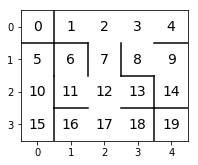

Next Wall: (5, 6)
Cells 5 and 6 are not connected --> remove wall!

New Union-Find Array:
[-1, 5, 1, 1, 3, -1, 1, 6, 1, 1, 5, 7, 11, 12, 9, 5, 6, 16, 16, -1]


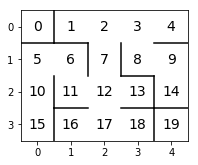

Next Wall: (1, 6)
Cells 1 and 6 are already connected -> keep wall!

Next Wall: (7, 8)
Cells 7 and 8 are already connected -> keep wall!

Next Wall: (15, 16)
Cells 15 and 16 are already connected -> keep wall!

Next Wall: (10, 11)
Cells 10 and 11 are already connected -> keep wall!

Next Wall: (11, 16)
Cells 11 and 16 are already connected -> keep wall!

Next Wall: (8, 13)
Cells 8 and 13 are already connected -> keep wall!

Next Wall: (13, 14)
Cells 13 and 14 are already connected -> keep wall!

Next Wall: (6, 7)
Cells 6 and 7 are already connected -> keep wall!

Next Wall: (0, 5)
Cells 0 and 5 are not connected --> remove wall!

New Union-Find Array:
[-1, 5, 1, 1, 3, 0, 1, 6, 1, 1, 5, 7, 11, 12, 9, 5, 6, 16, 16, -1]


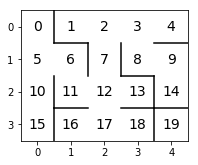

Next Wall: (14, 19)
Cells 14 and 19 are not connected --> remove wall!

New Union-Find Array:
[-1, 5, 1, 1, 3, 0, 1, 6, 1, 1, 5, 7, 11, 12, 9, 5, 6, 16, 16, 0]


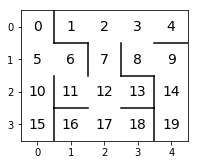

Next Wall: (18, 19)
Cells 18 and 19 are already connected -> keep wall!

Next Wall: (4, 9)
Cells 4 and 9 are already connected -> keep wall!

Next Wall: (0, 1)
Cells 0 and 1 are already connected -> keep wall!



In [3]:
toy_maze = maze_functions.Maze(4, 5, 6, show_construction= True)